Epoch 1/10
782/782 [==============================] - 8s 10ms/step - loss: 2.1239 - accuracy: 0.2129 - val_loss: 1.8849 - val_accuracy: 0.3274
Epoch 2/10
782/782 [==============================] - 7s 9ms/step - loss: 1.7877 - accuracy: 0.3607 - val_loss: 1.6953 - val_accuracy: 0.3957
Epoch 3/10
782/782 [==============================] - 7s 9ms/step - loss: 1.6470 - accuracy: 0.4121 - val_loss: 1.5856 - val_accuracy: 0.4375
Epoch 4/10
782/782 [==============================] - 7s 9ms/step - loss: 1.5674 - accuracy: 0.4427 - val_loss: 1.5291 - val_accuracy: 0.4510
Epoch 5/10
782/782 [==============================] - 7s 9ms/step - loss: 1.5058 - accuracy: 0.4636 - val_loss: 1.4881 - val_accuracy: 0.4629
Epoch 6/10
782/782 [==============================] - 7s 9ms/step - loss: 1.4494 - accuracy: 0.4810 - val_loss: 1.4280 - val_accuracy: 0.4887
Epoch 7/10
782/782 [==============================] - 7s 9ms/step - loss: 1.4014 - accuracy: 0.5013 - val_loss: 1.4141 - val_accuracy: 0.4950
Epoch

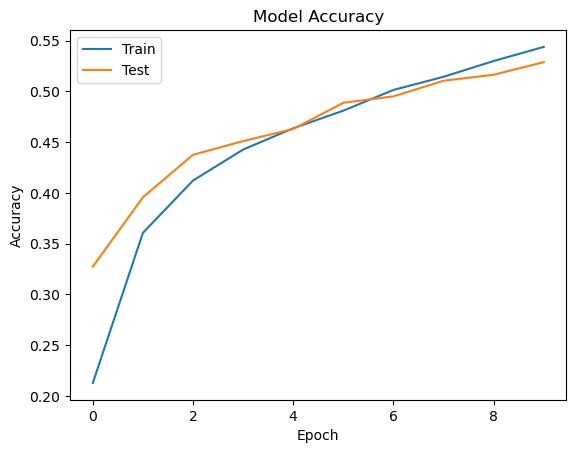

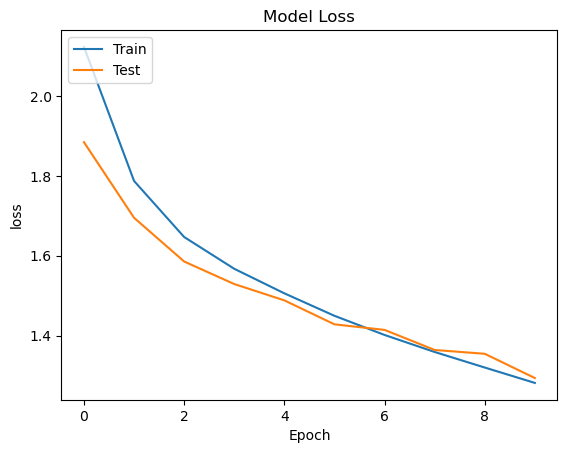

157/157 [==============================] - 1s 4ms/step - loss: 1.2933 - accuracy: 0.5287
Test accuracy: 0.5286999940872192


In [2]:
import tensorflow as tf
import tensorflow_datasets as tdf
import matplotlib.pyplot as py

(train_dataset,test_dataset),info=tdf.load('cifar10',split=['train','test'],with_info=True,as_supervised=True)
input_shape=info.features['image'].shape
num_classes=info.features['label'].num_classes

train_dataset=train_dataset.map(lambda x,y: (tf.cast(x,tf.float32)/255.0,y)).shuffle(1000).batch(64)
test_dataset=test_dataset.map(lambda x,y: (tf.cast(x,tf.float32)/255.0,y)).batch(64)

model=tf.keras.Sequential([
    tf.keras.layers.Conv2D(32,(3,3),activation='sigmoid',input_shape=input_shape),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Conv2D(64,(3,3),activation='sigmoid'),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64,activation='sigmoid'),
    tf.keras.layers.Dense(num_classes,activation='softmax')

])

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

history=model.fit(train_dataset,epochs=10,validation_data=test_dataset)

py.plot(history.history['accuracy'])
py.plot(history.history['val_accuracy'])
py.title('Model Accuracy')
py.xlabel('Epoch')
py.ylabel('Accuracy')
py.legend(['Train','Test'],loc='upper left')
py.show()

py.plot(history.history['loss'])
py.plot(history.history['val_loss'])
py.title('Model Loss')
py.xlabel('Epoch')
py.ylabel('loss')
py.legend(['Train','Test'],loc='upper left')
py.show()

test_loss,test_acc=model.evaluate(test_dataset)
print('Test accuracy:',test_acc)

